In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

In [ ]:
y['species'] = y['species'].map(lambda s: iris.target_names[s])

In [ ]:
data = pd.concat([X, y], axis=1)
data.head()

In [ ]:
# Analyse correlations

sns.pairplot(data, hue='species')

## Train Decision Tree

In [ ]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
# Train Decision Tree

from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluate

In [18]:
X.iloc[58]

sepal length (cm)    6.6
sepal width (cm)     2.9
petal length (cm)    4.6
petal width (cm)     1.3
Name: 58, dtype: float64

In [19]:
y.iloc[58]

species    versicolor
Name: 58, dtype: object

In [22]:
dtree.predict([X.iloc[58]])

array(['versicolor'], dtype=object)

In [23]:
# Evaluation tools

predictions = dtree.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13  0  0]
 [ 0 16  2]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.89      0.94        18
   virginica       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[Text(148.8, 199.32, 'X[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [37, 32, 36]'),
 Text(111.60000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(186.0, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.498\nsamples = 68\nvalue = [0, 32, 36]'),
 Text(148.8, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(74.4, 90.6, 'X[0] <= 4.95\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(37.2, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(111.60000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(223.20000000000002, 90.6, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(186.0, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(260.40000000000003, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(223.20000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = 

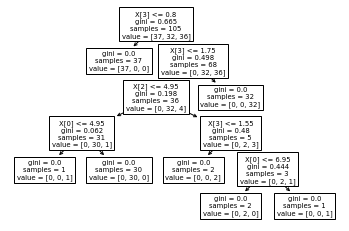

In [26]:
tree.plot_tree(dtree)